In [10]:
import pandas as pd

admissions = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\scikit-learn\data\\admissions.csv"
)
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)
admissions[:5]


,gpa,gre,actual_label
0,3.177277,594.102992,0
1,3.412655,631.528607,0
2,2.728097,553.714399,0
3,3.093559,551.089985,0
4,3.141923,537.184894,0


In [9]:
import numpy as np

np.random.seed(0)
# 乱序
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]

# 分为训练集和测试集
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]
shuffled_admissions[:5]


,gpa,gre,actual_label
638,3.257304,689.773376,1
165,3.320750,716.173275,0
468,3.645978,749.877819,1
312,3.243188,665.619332,0
433,3.312396,647.094820,1


In [13]:
from sklearn.linear_model import LogisticRegression

# 逻辑回归
model = LogisticRegression()
# 使用训练集训练
model.fit(train[["gpa"]], train["actual_label"])

# 在测试集上查看结果
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels

matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
# 查看精度
accuracy = len(correct_predictions) / float(len(test))
print("accuracy=", accuracy)


accuracy= 0.7131782945736435


D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
# 计算TPR,TNR
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 0)
true_negatives = len(test[true_negative_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_negatives = len(test[false_negative_filter])

tpr = true_positives / float(true_positives + false_negatives)
tnr = true_negatives / float(true_negatives + false_positives)
print("tpr=", tpr)
print("tnr=", tnr)


tpr= 0.1282051282051282
tnr= 0.9666666666666667


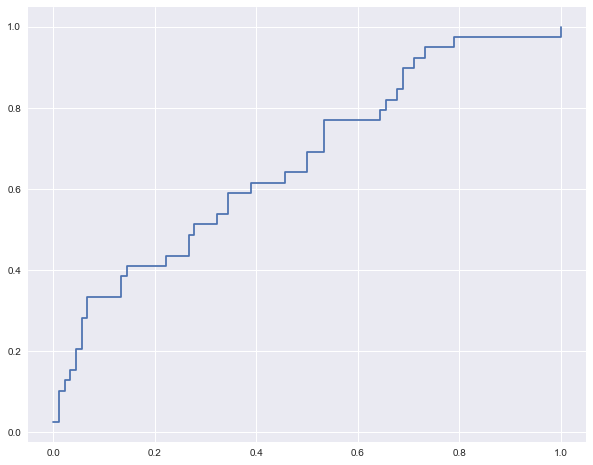

In [15]:
# ROC曲线
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
% matplotlib inline

probabilities = model.predict_proba(test[["gpa"]])
# 注意这里要用predict_proba的结果
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:, 1])

sns.set()
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.show()

# roc曲线包含的面积，可以表示模型预测整理正例和负例的效果


In [16]:
# roc_score
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(test[["gpa"]])

auc_score = roc_auc_score(test["actual_label"], probabilities[:, 1])
print(auc_score)


0.6675213675213675
